In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [4]:
earth_radius = 6378.1  # km - radius of the earth
moon_radius = 1737.4  # km - radius of the moon

earth_to_moon = 384402 # km - mean distance to the moon

dc_to_oakland = 3915  # km - distance from DC to Oakland

dc_latitude = 38.89511  # deg
dc_longitude = -77.03637  # deg

oak_latitude = 37.80437  # deg
oak_longitude = -122.2708  # deg

In [10]:
delta_longitude = np.abs(np.abs(oak_longitude) - np.abs(dc_longitude))/180*np.pi

45.23442999999999

In [ ]:
t = np.linspace(0, 2*np.pi, 100)

earth_x = earth_radius*np.cos(t)
earth_y = earth_radius*np.sin(t)

moon_x = moon_radius*np.cos(t) + earth_to_moon
moon_y = moon_radius*np.sin(t)

dc_x = -earth_radius*np.cos(delta_longitude/2)
dc_y = -earth_radius*np.sin(delta_longitude/2)

oak_x = -earth_radius*np.cos(-delta_longitude/2)
oak_y = -earth_radius*np.sin(-delta_longitude/2)

aspect_ratio = earth_radius*2/earth_to_moon

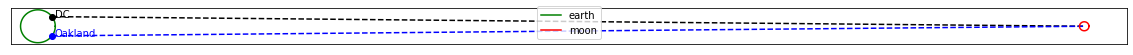

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20*aspect_ratio))
ax.plot(earth_x, earth_y, '-g', label='earth')
ax.plot(dc_x, dc_y, 'ok')
ax.plot(oak_x, oak_y, 'ob')

ax.plot([dc_x, earth_to_moon], [dc_y, 0], '--k')

ax.plot([oak_x, earth_to_moon], [oak_y, 0], '--b')

ax.text(dc_x+1000, dc_y, 'DC')
ax.text(oak_x+1000, oak_y, 'Oakland', color='blue')

ax.plot(moon_x, moon_y, '-r', label='moon')
ax.set_xlim([-10000, 400000])
ax.set_ylim([-7000, 7000])

ax.set_xticks([])
ax.set_yticks([])
ax.legend();
plt.show()

In [51]:
oak_ang = np.arctan2(oak_y, earth_to_moon-oak_x)
dc_ang = np.arctan2(dc_y, earth_to_moon-dc_x)

print(100 - (np.abs(oak_ang) + np.abs(dc_ang))*180/np.pi / 360 * 100)

oak_line_x = moon_radius*np.array([-np.sin(oak_ang), np.sin(oak_ang)]) + earth_to_moon
oak_line_y = moon_radius*np.array([-np.cos(oak_ang), np.cos(oak_ang)])

dc_line_x = moon_radius*np.array([-np.sin(dc_ang), np.sin(dc_ang)]) + earth_to_moon
dc_line_y = moon_radius*np.array([-np.cos(dc_ang), np.cos(dc_ang)])


99.6863177884368


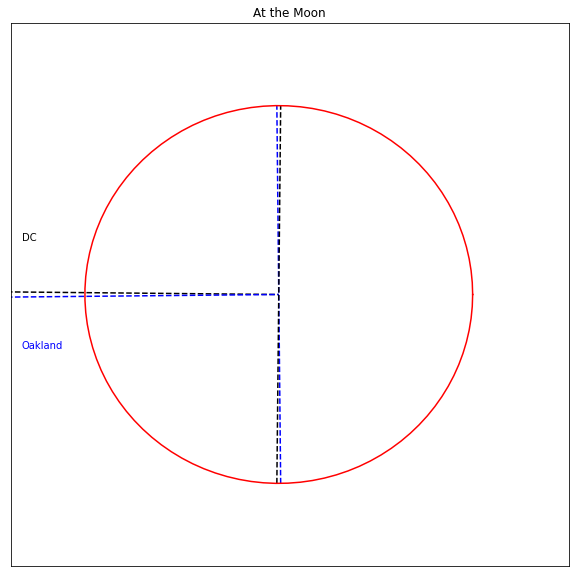

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot([dc_x, earth_to_moon], [dc_y, 0], '--k')
ax.plot([oak_x, earth_to_moon], [oak_y, 0], '--b')

ax.plot(oak_line_x, oak_line_y, '--b')
ax.plot(dc_line_x, dc_line_y, '--k')

ax.text(382100, 500, 'DC', color='black')
ax.text(382100, -500, 'Oakland', color='blue')

ax.plot(moon_x, moon_y, '-r', label='moon')
ax.set_xlim([382000, 387000])
ax.set_ylim([-2500, 2500])

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('At the Moon')
plt.show()